# 导入包

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据分隔
from sklearn.model_selection import train_test_split

# 支持向量机
from sklearn import svm

# PCA降维
from sklearn.decomposition import PCA
import time

# 获取数据

In [37]:
train_data = pd.read_csv("../data/mnist/mnist_train.csv")

In [38]:
train_data.head()
# 每一行都是一副图片

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,4.453924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,2.889294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [40]:
train_data.shape, train_data.size

((59999, 785), 47099215)

## 获取特征值/目标值

In [41]:
# 获取图像,去除第一列的标签
train_image = train_data.iloc[:, 1:]
train_image.shape

(59999, 784)

In [42]:
# 获取标签
train_label = train_data.iloc[:, 0]
train_label.head()

0    0
1    4
2    1
3    9
4    2
Name: label, dtype: int64

## 查看具体图像

In [43]:
# 每一行都是一副图片
train_image.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [44]:
# 定义画图函数
def to_plot(n: int):
    # 每一行都是一副图片 修改成默认形状
    number = train_image.iloc[n].values.reshape(28, 28)
    plt.imshow(number)
    # 关掉轴
    plt.axis("off")
    plt.show()

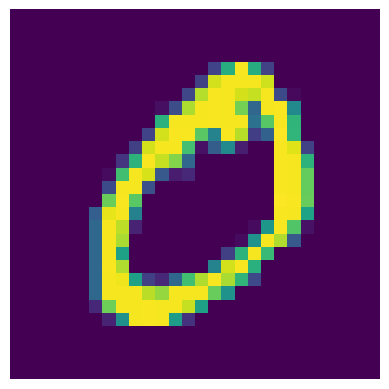

In [45]:
to_plot(0)

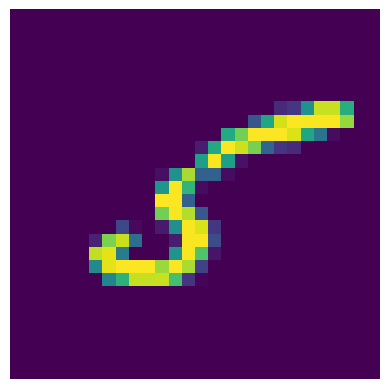

In [46]:
to_plot(10)

# 数据基本处理

## 数据归一化,整体除以255

In [51]:
train_image1 = train_image.values / 255.0
train_image1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 目标值处理,二维转为一维数据

In [50]:
train_label1 = train_label.values
train_label1

array([0, 4, 1, ..., 5, 6, 8], dtype=int64)

## 分割数据集

In [52]:
x_train, x_val, y_train, y_val = train_test_split(
    train_image1, train_label1, test_size=0.2, random_state=0
)

In [53]:
x_train.shape, x_val.shape
# 列数太多,特征太多

((47999, 784), (12000, 784))

# 特征降维和模型训练

## 多次使用PCA降维,确定最后的最优模型

sklearn.decomposition.PCA(n_components=None)

    将数据分解为较低维数空间
    n_components:
        小数：表示保留百分之多少的信息
        整数：减少到多少特征
    PCA.fit_transform(X) X:numpy array格式的数据[n_samples,n_features]
    返回值：转换后指定维度的array



In [55]:
def n_components_analysis(n_components: float, x_train, x_val, y_train, y_val) -> float:
    # 记录开始时间
    start = time.time()

    # 构造PCA降维
    pca = PCA(n_components=n_components)
    print("特征降维传递的参数为:{}".format(n_components))

    # fit和transform可以分开也可以一起使用,分开使用的情况是针对多个数据进行相同的处理
    pca.fit(x_train)
    print("pca下采样到:", pca.n_components_)
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)

    # 利用svm.SVC进行训练
    print("开始使用SVC训练")
    svc = svm.SVC()
    svc.fit(x_train_pca, y_train)

    # 获取accuracy结果
    accuracy = svc.score(x_val_pca, y_val)

    # 记录结束时间
    end = time.time()

    print("准确率：{},消耗时间：{} s".format(accuracy, int(end - start)))
    print("*" * 50)

    return accuracy

## 传递多次pca比例参数

In [56]:
# 传递多个n_components值,寻找合理的n_components
n_components = np.arange(0.3, 0.9, 0.05)
n_components

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 ])

In [57]:
accuracys = []
for n in n_components:
    accuracy = n_components_analysis(n, x_train, x_val, y_train, y_val)
    accuracys.append(accuracy)

特征降维传递的参数为:0.3
开始使用SVC训练
准确率：0.7585,消耗时间：90
特征降维传递的参数为:0.35
开始使用SVC训练
准确率：0.8380833333333333,消耗时间：56
特征降维传递的参数为:0.39999999999999997
开始使用SVC训练
准确率：0.8785,消耗时间：53
特征降维传递的参数为:0.44999999999999996
开始使用SVC训练
准确率：0.9216666666666666,消耗时间：45
特征降维传递的参数为:0.49999999999999994
开始使用SVC训练
准确率：0.9420833333333334,消耗时间：52
特征降维传递的参数为:0.5499999999999999
开始使用SVC训练
准确率：0.9618333333333333,消耗时间：57
特征降维传递的参数为:0.5999999999999999
开始使用SVC训练
准确率：0.97,消耗时间：55
特征降维传递的参数为:0.6499999999999999
开始使用SVC训练
准确率：0.97525,消耗时间：42
特征降维传递的参数为:0.7
开始使用SVC训练
准确率：0.9785,消耗时间：45
特征降维传递的参数为:0.7499999999999999
开始使用SVC训练
准确率：0.9806666666666667,消耗时间：46
特征降维传递的参数为:0.7999999999999998
开始使用SVC训练
准确率：0.9823333333333333,消耗时间：64
特征降维传递的参数为:0.8499999999999999
开始使用SVC训练
准确率：0.982,消耗时间：79
特征降维传递的参数为:0.8999999999999999
开始使用SVC训练
准确率：0.9824166666666667,消耗时间：93


## 准确率可视化显示

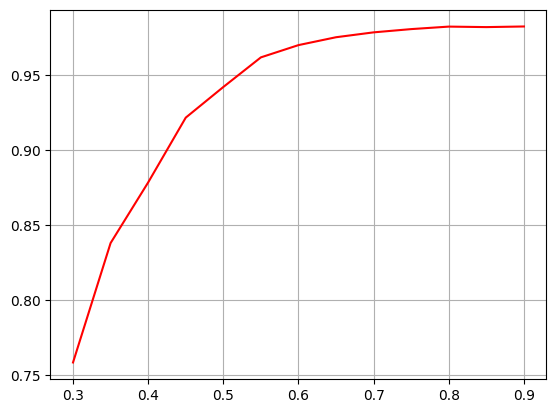

In [58]:
plt.plot(n_components, accuracys, color="red")
plt.grid()
plt.show()

# 确定最优模型

## 特征降维
经过图形展示,选择合理的n_components,最后的综合考虑结果是0.80

In [59]:
pca = PCA(n_components=0.8)

In [61]:
pca.fit(x_train)

PCA(n_components=0.8)

In [62]:
# 显示输入和输出特征数量
pca.n_features_in_, pca.n_components_

(784, 44)

In [63]:
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)
x_train_pca.shape, x_val_pca.shape

((47999, 44), (12000, 44))

## SVM

In [64]:
# 训练比较优的模型,计算accuracy
svc = svm.SVC()

In [65]:
svc.fit(x_train_pca, y_train)

SVC()

In [66]:
svc.score(x_val_pca, y_val)

0.9823333333333333

# test训练集测试

In [84]:
test_data = pd.read_csv("../data/mnist/mnist_test.csv")

In [85]:
test_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 获取图片

In [86]:
test_image = test_data.iloc[:, 1:]
test_image.shape

(9999, 784)

## 获取label

In [88]:
test_label = test_data.iloc[:, 0]
test_label.shape

(9999,)

## 图片归一化(不要忘记)

In [89]:
test_image1 = test_image.values / 255.0

## 目标值处理,二维转为一维数据

In [90]:
test_label1 = test_label.values
test_label1

array([2, 1, 0, ..., 4, 5, 6], dtype=int64)

## 预测图片pca特征降维(不要忘记)

In [91]:
x_test_pca = pca.transform(test_image1)
x_test_pca.shape

(9999, 44)

## 预测得分

In [92]:
svc.score(x_test_pca, test_label1)

0.9814981498149815

## 不归一化的后果

In [93]:
x_test_pca_255 = pca.transform(test_image.values)

In [94]:
svc.score(x_test_pca_255, test_label1)

0.0892089208920892

## 预测结果

In [95]:
y_pred = svc.predict(x_test_pca)

## 结果转换为df

In [97]:
res = pd.DataFrame(y_pred, columns=["number"])
res

,number
0,2
1,1
2,0
3,4
4,1
...,...
9994,2
9995,3
9996,4
9997,5


In [99]:
res.to_csv("../data/mnist/test_number.csv", index=False)